**Windy gridworld**

**Code/plot: In this question, you will implement several TD-learning methods and apply them to the windy
gridworld as described in the readme**

(a) Implement the windy gridworld domain.

(b) Implement the TD Learning methods, to be applied to windy gridworld

(c) Windy gridworld with King’s moves

(d) Stochastic wind


In [1]:
#pip install gym


In [2]:
#pip list


In [ ]:
#pip install setuptools==65.5.0 pip==21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 65.5

In [ ]:
#pip install gym==0.21

     |████████████████████████████████| 1.5 MB 2.1 MB/s 
  ERROR: Failed building wheel for gym
  Running setup.py clean for gym
Failed to build gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
    Running setup.py install for gym ... done
  DEPRECATION: gym was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
#pip list


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

**Environment**

**register(id="WindyGridWorld-v0",entry_point = env:WindyGridWorldEnv")**

Register defines an environment called "WindyGridWorld-v0" and specifies that it can be created using the Python class or function implemented in "env:WindyGridWorldEnv."
   

In [3]:
from enum import IntEnum
from typing import Tuple, Optional, List
from gym import Env, spaces
from gym.utils import seeding
from gym.envs.registration import register
import numpy as np



def register_env() -> None:
    """Register custom gym environment so that we can use `gym.make()`

    In your main file, call this function before using `gym.make()` to use the Four Rooms environment.
        register_env()
        env = gym.make('WindyGridWorld-v0')

    There are a couple of ways to create Gym environments of the different variants of Windy Grid World.
    1. Create separate classes for each env and register each env separately.
    2. Create one class that has flags for each variant and register each env separately.

        Example:
        (Original)     register(id="WindyGridWorld-v0", entry_point="env:WindyGridWorldEnv")
        (King's moves) register(id="WindyGridWorldKings-v0", entry_point="env:WindyGridWorldEnv", **kwargs)

        The kwargs will be passed to the entry_point class.

    3. Create one class that has flags for each variant and register env once. You can then call gym.make using kwargs.

        Example:
        (Original)     gym.make("WindyGridWorld-v0")
        (King's moves) gym.make("WindyGridWorld-v0", **kwargs)

        The kwargs will be passed to the __init__() function.

    Choose whichever method you like.
    """
    # TODO
    register(id="WindyGridWorld-v0",entry_point = "env:WindyGridWorldEnv")
    register(id = "WindyGridWorldKings-v0", entry_point = "env:WindyGridWorldKingsEnv")
    register(id = "WindyGridWorldKings-v1", entry_point = "env:StochWindyGridWorldKingsEnv")

In [4]:
from enum import IntEnum
from typing import Tuple, Optional, List
from gym import Env, spaces
from gym.utils import seeding
from gym.envs.registration import register
import numpy as np


def register_env() -> None:
    """Register custom gym environment so that we can use `gym.make()`

    In your main file, call this function before using `gym.make()` to use the Four Rooms environment.
        register_env()
        env = gym.make('WindyGridWorld-v0')

    There are a couple of ways to create Gym environments of the different variants of Windy Grid World.
    1. Create separate classes for each env and register each env separately.
    2. Create one class that has flags for each variant and register each env separately.

        Example:
        (Original)     register(id="WindyGridWorld-v0", entry_point="env:WindyGridWorldEnv")
        (King's moves) register(id="WindyGridWorldKings-v0", entry_point="env:WindyGridWorldEnv", **kwargs)

        The kwargs will be passed to the entry_point class.

    3. Create one class that has flags for each variant and register env once. You can then call gym.make using kwargs.

        Example:
        (Original)     gym.make("WindyGridWorld-v0")
        (King's moves) gym.make("WindyGridWorld-v0", **kwargs)

        The kwargs will be passed to the __init__() function.

    Choose whichever method you like.
    """
    register(id="WindyGridWorld-v0",entry_point = "env:WindyGridWorldEnv")
    register(id = "WindyGridWorldKings-v0", entry_point = "env:WindyGridWorldKingsEnv")
    register(id = "WindyGridWorldKings-v1", entry_point = "env:StochWindyGridWorldKingsEnv")


class Action(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3


def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    """
    Helper function to map action to changes in x and y coordinates
    Args:
        action (Action): taken action
    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        Action.LEFT: (0, -1),
        Action.DOWN: (1, 0),
        Action.RIGHT: (0, 1),
        Action.UP: (-1, 0),
    }
    return mapping[action]


class WindyGridWorldEnv(Env):
    def __init__(self):
        """Windy grid world gym environment
        """
        # Grid dimensions (x, y)
        self.rows = 10
        self.cols = 10

        # Wind
        # TODO define self.wind as either a dict (keys would be states) or multidimensional array (states correspond to indices)
        self.wind = np.zeros((self.rows, self.cols),dtype=int)
        self.wind[:, [3, 4, 5, 8]] = 1
        self.wind[:, [6, 7]] = 2
        self.action_space = spaces.Discrete(len(Action))
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(self.rows), spaces.Discrete(self.cols))
        )

        # Set start_pos and goal_pos
        self.start_pos = (0,3)
        self.goal_pos = (7,3)
        self.agent_pos = None

    def seed(self, seed: Optional[int] = None) -> List[int]:
        """Fix seed of environment

        In order to make the environment completely reproducible, call this function and seed the action space as well.
            env = gym.make(...)
            env.seed(seed)
            env.action_space.seed(seed)

        This function does not need to be used for this assignment, it is given only for reference.
        """

        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action: Action) -> Tuple[Tuple[int, int], float, bool, dict]:
        """Take one step in the environment.

        Takes in an action and returns the (next state, reward, done, info).
        See https://github.com/openai/gym/blob/master/gym/core.py#L42-L58 foand r more info.

        Args:
            action (Action): an action provided by the agent

        Returns:
            observation (object): agent's observation after taking one step in environment (this would be the next state s')
            reward (float) : reward for this transition
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning). Not used in this assignment.
        """
        # TODO
        done = False
        reward = -1
        dx, dy = actions_to_dxdy(action)
        x  = min(max((self.agent_pos[0] + dx - self.wind[self.agent_pos]),0), self.rows-1)
        y = min(max(self.agent_pos[1] + dy, 0), self.cols-1)
        self.agent_pos = (x, y)
        if self.agent_pos == self.goal_pos:
            return self.agent_pos, -1, True, {}
        return self.agent_pos, reward, done, {}


# Gym environment for windy grid world with Kings moves
# Re-solve the windy gridworld assuming eight possible actions, including the diagonal moves, rather than four

class KingAction(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3
    LEFT_UP = 4
    RIGHT_UP = 5
    LEFT_DOWN = 6
    RIGHT_DOWN = 7



def king_movesactions_to_dxdy(action: KingAction) -> Tuple[int, int]:
    """
    Helper function to map action to changes in x and y coordinates
    Args:
        action (KingAction): taken action
    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        KingAction.LEFT: (0, -1),
        KingAction.DOWN: (1, 0),
        KingAction.RIGHT: (0, 1),
        KingAction.UP: (-1, 0),
        KingAction.LEFT_UP: (-1, -1),
        KingAction.RIGHT_UP: (-1, 1),
        KingAction.LEFT_DOWN: (1, -1),
        KingAction.RIGHT_DOWN: (1, 1),

    }
    return mapping[action]


class WindyGridWorldKingsEnv(Env):
    def __init__(self):
        """Windy grid world gym environment with Kings moves (8 actions)
        """
        # Grid dimensions (x, y)
        self.rows = 10
        self.cols = 10

        # Wind
        # TODO define self.wind as either a dict (keys would be states) or multidimensional array (states correspond to indices)
        self.wind = np.zeros((self.rows, self.cols),dtype=int)
        self.wind[:, [3, 4, 5, 8]] = 1
        self.wind[:, [6, 7]] = 2
        self.action_space = spaces.Discrete(len(KingAction))
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(self.rows), spaces.Discrete(self.cols))
        )

        # Set start_pos and goal_pos
        self.start_pos = (0,3)
        self.goal_pos = (7,3)
        self.agent_pos = None

    def seed(self, seed: Optional[int] = None) -> List[int]:
        """Fix seed of environment

        In order to make the environment completely reproducible, call this function and seed the action space as well.
            env = gym.make(...)
            env.seed(seed)
            env.action_space.seed(seed)

        This function does not need to be used for this assignment, it is given only for reference.
        """

        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action: Action) -> Tuple[Tuple[int, int], float, bool, dict]:
        """Take one step in the environment.

        Takes in an action and returns the (next state, reward, done, info).
        See https://github.com/openai/gym/blob/master/gym/core.py#L42-L58 foand r more info.

        Args:
            action (Action): an action provided by the agent

        Returns:
            observation (object): agent's observation after taking one step in environment (this would be the next state s')
            reward (float) : reward for this transition
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning). Not used in this assignment.
        """
        # TODO
        done = False
        reward = -1
        dx, dy = king_movesactions_to_dxdy(action)
        x  = min(max((self.agent_pos[0] + dx - self.wind[self.agent_pos]),0), self.rows-1)
        y = min(max(self.agent_pos[1] + dy, 0), self.cols-1)
        self.agent_pos = (x, y)
        if self.agent_pos == self.goal_pos:
            return self.agent_pos, -1, True, {}
        return self.agent_pos, reward, done, {}


# Gym environment for windy grid world with Kings moves and stochastic wind
# Re-solve the windy gridworld task with King’s moves, assuming that the effect of the
# wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column.
class StochWindyGridWorldKingsEnv(Env):
    def __init__(self):
        """Windy grid world gym environment with Kings moves (8 actions)
        """
        # Grid dimensions (x, y)
        self.rows = 10
        self.cols = 10

        # Wind
        # TODO define self.wind as either a dict (keys would be states) or multidimensional array (states correspond to indices)
        self.wind = np.zeros((self.rows, self.cols),dtype=int)
        self.wind[:, [3, 4, 5, 8]] = 1
        self.wind[:, [6, 7]] = 2
        self.action_space = spaces.Discrete(len(KingAction))
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(self.rows), spaces.Discrete(self.cols))
        )

        # Set start_pos and goal_pos
        self.start_pos = (0,3)
        self.goal_pos = (7,3)
        self.agent_pos = None

    def seed(self, seed: Optional[int] = None) -> List[int]:
        """Fix seed of environment

        In order to make the environment completely reproducible, call this function and seed the action space as well.
            env = gym.make(...)
            env.seed(seed)
            env.action_space.seed(seed)

        This function does not need to be used for this assignment, it is given only for reference.
        """

        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.agent_pos = self.start_pos
        return self.agent_pos

    def step(self, action: Action) -> Tuple[Tuple[int, int], float, bool, dict]:
        """Take one step in the environment.

        Takes in an action and returns the (next state, reward, done, info).
        See https://github.com/openai/gym/blob/master/gym/core.py#L42-L58 foand r more info.

        Args:
            action (Action): an action provided by the agent

        Returns:
            observation (object): agent's observation after taking one step in environment (this would be the next state s')
            reward (float) : reward for this transition
            done (bool): whether the episode has ended, in which case further step() calls will return undefined results
            info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning). Not used in this assignment.
        """
        # TODO
        # Computing how the wind affects the current column
        # Stochastic wind effect: sometimes move exactly according to the mean values,
        # sometimes move one cell above, and sometimes move one cell below [-1,0,1]
        done = False
        reward = -1
        # Updating the agent's position based on the chosen action and stochastic wind
        dx, dy = king_movesactions_to_dxdy(action)
        x  = min(max((self.agent_pos[0] + dx - self.wind[self.agent_pos]+np.random.choice([-1,0,1])),0), self.rows-1)
        y = min(max(self.agent_pos[1] + dy, 0), self.cols-1)
        self.agent_pos = (x, y)
        if self.agent_pos == self.goal_pos:
            return self.agent_pos, -1, True, {}
        return self.agent_pos, reward, done, {}

**(b) Implement the following methods, to be applied to windy gridworld:**

**• On-policy Monte-Carlo control (for ε-soft policies) – consider using your code from Ex4**

**• SARSA (on-policy TD control)**

**• Expected SARSA**

**• n-step SARSA (use n = 4)**

**• Q-learning (off-policy TD control)**

**• Optional : Dynamic programming (to provide an upper bound)**


**Imports,Generate Episode, Argmax, create_epsilon_policy**

In [5]:
import gym
from typing import Callable, Tuple
from collections import defaultdict
from tqdm import trange
import numpy as np
from typing import List, Dict, Optional, Sequence


def generate_episode(env: gym.Env,Q:defaultdict,epsilon:float,num_steps:int) -> List[Tuple[int,int,float]]:
    """A function to generate one episode and collect the sequence of (s, a, r) tuples

    This function will be useful for implementing the MC methods

    Args:
        env (gym.Env): a Gym API compatible environment
        Q (defaultdict): Q-values
        epsilon (float): epsilon for epsilon greedy
        num_steps (int): Number of steps
    """
    episode = []
    state = env.reset()
    i = 0
    while i < num_steps:
        action = epsilon_greedy(Q,state,epsilon)
        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward))
        if done:
            return episode,done
        state = next_state
        i+=1
    return episode,done

def argmax(arr: Sequence[float]) -> int:
    """Argmax that breaks ties randomly

    Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

    Args:
        arr: sequence of values
    """
    return np.random.choice(np.flatnonzero(arr == arr.max()))




**Epsilon- Greedy Policy**

In [6]:
def epsilon_greedy(Q,state,epsilon) -> int:
    """Epsilon-greedy action selection
    Given a Q function and a state, returns an action selected by epsilon-greedy exploration.

    Args:
        Q (defaultdict): Q-values
        state (int): state
        epsilon (float): epsilon for epsilon greedy
    """
    num_actions = len(Q[state])
    if np.random.random() < epsilon:
        return np.random.randint(num_actions)
    else:
        return argmax(Q[state])

 **On-policy Monte-Carlo control (for ε-soft policies) – consider using your code from Ex4**

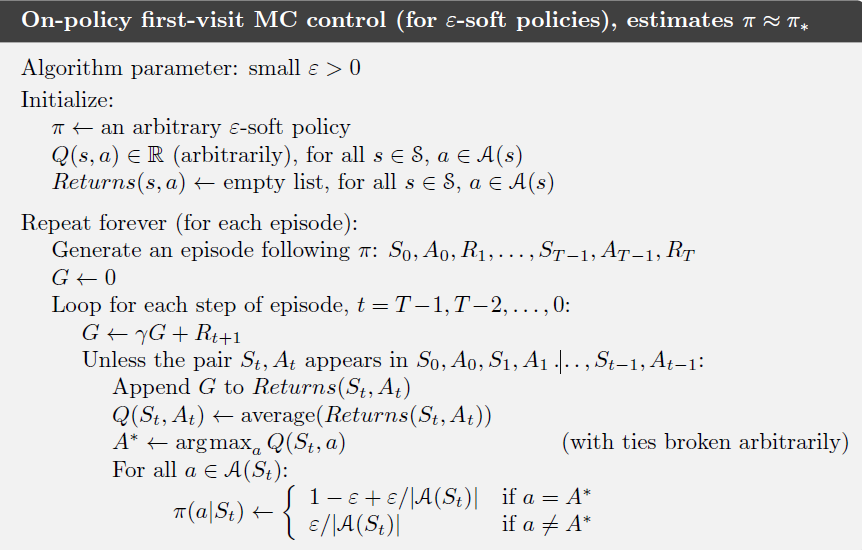

In [7]:
def on_policy_mc_control_epsilon_soft(
    env: gym.Env, num_steps: int, gamma: float, epsilon: float
):
    """On-policy Monte Carlo policy control for epsilon soft policies.

    Args:
        env (gym.Env): a Gym API compatible environment
        num_episodes (int): Number of episodes
        gamma (float): Discount factor of MDP
        epsilon (float): Parameter for epsilon soft policy (0 <= epsilon <= 1)
    Returns:

    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    episodes_complete = []
    ep = 0
    steps = 0
    ep_count = 0
    while steps < num_steps:
        G = 0.0
        episode,done= generate_episode(env,Q,epsilon,num_steps)
        ep = len(episode)
        if done:
            ep_count+=1
        if steps + ep > num_steps:
            episodes_complete[steps:num_steps+1] = [ep_count]*(num_steps-steps)
            break
        else:
            episodes_complete.extend([ep_count]*ep)
        for t in range(len(episode)-1,-1,-1):
        # For each episode calculate the return
        # Update Q and N
            reward = episode[t][2]
            G = gamma * G + reward
            current_state = episode[t][0]
            current_action = episode[t][1]
            previous_state_action = [(i[0],i[1]) for i in episode[0:t]]
            if (current_state,current_action) not in previous_state_action:
                N[current_state][current_action]+=1.0
                Q[current_state][current_action]+= (1/N[current_state][current_action]) * (G-Q[current_state][current_action])
        steps+=ep
    return Q, episodes_complete


**SARSA (on-policy TD control)**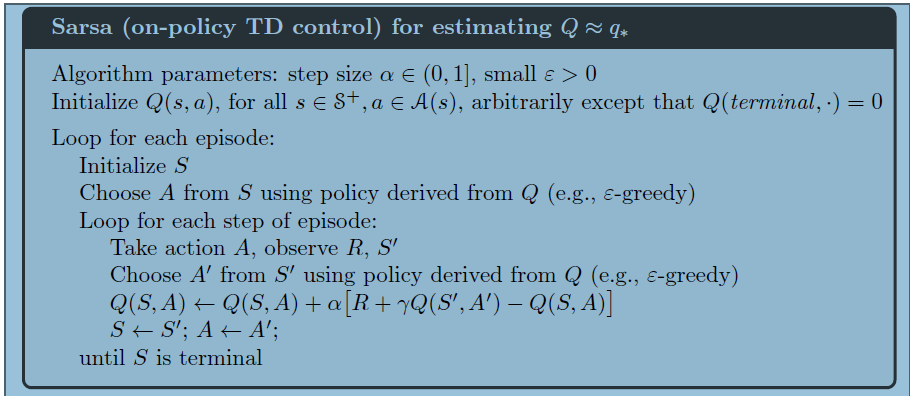

In [8]:
def sarsa(env: gym.Env, num_steps: int, gamma: float, epsilon: float, step_size: float):
    """One-step SARSA
    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    episodes_complete = []
    ep = 0
    state = env.reset()
    action = epsilon_greedy(Q, state, epsilon)
    for step in range(num_steps):
        next_state, reward, done, _ = env.step(action)
        next_action  = epsilon_greedy(Q, next_state, epsilon)
        if done:
            ep+=1
            state = env.reset()
            action = epsilon_greedy(Q, state, epsilon)
        else:
            Q[state][action] += step_size * (reward + gamma * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action
        episodes_complete.append(ep)
    return Q, episodes_complete

**Expected Sarsa**

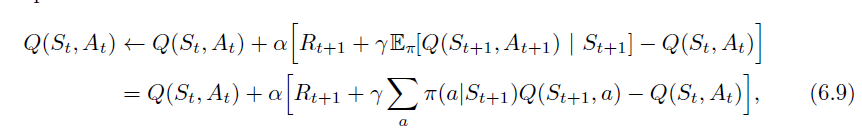

**Difference between Sarsa and Expected Sarsa- Sum over possible next actions taking into account their probabilities of being selected in the next state**

**Given the next state, St+1, this
algorithm moves deterministically in the same direction as Sarsa moves in expectation,
and accordingly it is called Expected Sarsa**

In [9]:
def expectation(Q,state,epsilon) -> float:
    """Calculate the expectation of the Q-values for a given state.

    Args:
        Q (defaultdict): Q-values
        state (int): state
        epsilon (float): epsilon for epsilon greedy
    """
    exp = 0
    num_actions = len(Q[state])
    best_action = argmax(Q[state])
    probs = [epsilon/num_actions]*num_actions
    probs[best_action] = 1-epsilon + (epsilon/num_actions)
    for i in range(num_actions):
        exp+= probs[i]*Q[state][i]
    return exp

def exp_sarsa(
    env: gym.Env,
    num_steps: int,
    gamma: float,
    epsilon: float,
    step_size: float,
):
    """Expected SARSA

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    episodes_complete= []
    ep = 0
    state = env.reset()
    for step in range(num_steps):
        action  = epsilon_greedy(Q, state, epsilon)
        next_state, reward, done, _ = env.step(action)
        if done:
            ep+=1
            state = env.reset()
        else:
            Q[state][action] += step_size * (reward + gamma * expectation(Q, next_state, epsilon) - Q[state][action])
            state = next_state
        episodes_complete.append(ep)
    return Q, episodes_complete


**n-step SARSA (use n = 4)**

**Update Rule:**  

**N-step SARSA**- an extension of the SARSA algorithm  considers the consequences of actions over multiple time steps, beyond the immediate next step

**SARSA** - The update rule is based on the immediate reward and the estimated value of the next state-action pair

**EXPECTED SARSA** - Uses the expected value of Q(s', a') instead of the value of a specific action in the update rule

In [10]:
def nstep_sarsa(
    env: gym.Env,
    num_steps: int,
    n: int,
    gamma: float,
    epsilon: float,
    step_size: float,
):
    """N-step SARSA
    On-policy TD Control to find optimal epsilon-greedy policy

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        n (int): The number of steps to use for TD update. Use n=1 for TD(0).
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    ep = 0
    episodes_complete = []
    tau = 0
    t_episode = 0
    past_actions = []
    past_rewards = []
    past_states = []
    state = env.reset()
    action = epsilon_greedy(Q, state, epsilon)
    past_actions.append(action)
    past_states.append(state)
    for steps in range(num_steps):
        next_state, reward, done, _ = env.step(action)
        next_action  = epsilon_greedy(Q,next_state, epsilon)
        past_rewards.append(reward)
        past_states.append(next_state)
        past_actions.append(next_action)
        if done:
            ep+=1
            t_episode = 0
            past_actions = []
            past_rewards = []
            past_states = []
            state = env.reset()
            action = epsilon_greedy(Q, state, epsilon)
            past_actions.append(action)
            past_states.append(state)
        else:
            tau = t_episode - n + 1
            if tau >= 0:
                G = 0.0
                G = np.sum([np.power(gamma,(i-tau-1))*past_rewards[i] for i in range(tau+1,min(tau+n,num_steps))])
                if tau + n < num_steps:
                    G +=np.power(gamma,n) * Q[past_states[(tau+n)]][past_actions[(tau+n)]]
                tau_s, tau_a = past_states[tau], past_actions[tau]
                Q[tau_s][tau_a] += step_size * (G - Q[tau_s][tau_a])
            t_episode += 1
            state = next_state
            action = next_action
        episodes_complete.append(ep)
    return Q, episodes_complete

**Q-learning (off-policy TD control)**

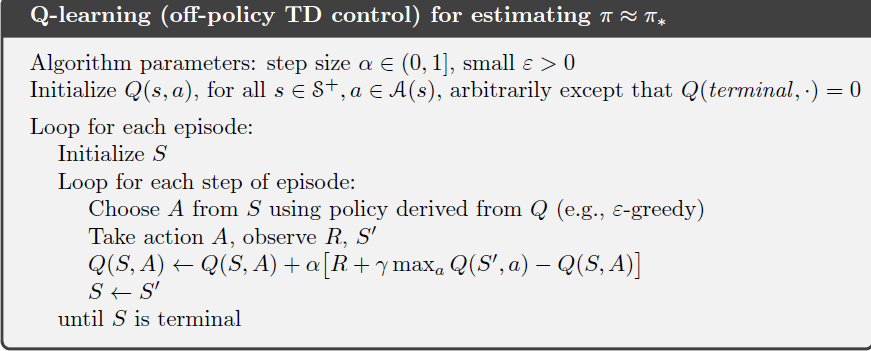

In [11]:
def q_learning(
    env: gym.Env,
    num_steps: int,
    gamma: float,
    epsilon: float,
    step_size: float,
):
    """Q-learning

    Args:
        env (gym.Env): a Gym API compatible environment
        num_steps (int): Number of steps
        gamma (float): Discount factor of MDP
        epsilon (float): epsilon for epsilon greedy
        step_size (float): step size
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    episodes_complete = []
    ep = 0
    state = env.reset()
    for step in range(num_steps):
        action  = epsilon_greedy(Q, state, epsilon)
        next_state, reward, done, _ = env.step(action)
        if done:
            ep+=1
            state = env.reset()
        else:
            best_action = argmax(Q[next_state])
            Q[state][action] += step_size * (reward + gamma * Q[next_state][best_action] - Q[state][action])
            state = next_state
        episodes_complete.append(ep)
    return Q, episodes_complete

**Perform at least 10 trials, and show the average performance with confidence bands (1.96× standard error)**


  **Confidence Bands**:

 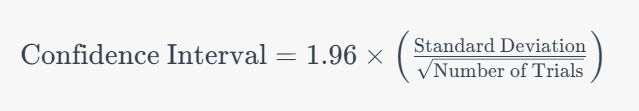

**Shaded Regions**- around the mean lines in the plot represent the confidence bands

Variability in performance across different trials can be deduced from it. Wider the confidence band higher is the variance

In [12]:
import itertools
import matplotlib.pyplot as plt
import gym
import numpy as np
import tqdm
from itertools import product

def plot_environment(sarsa,ql,exp_sarsa,nsarsa,mc,env_name):
    mean_sarsa = np.mean(sarsa,axis=0)
    mean_ql = np.mean(ql,axis=0)
    mean_exp = np.mean(exp_sarsa,axis=0)
    mean_nsarsa = np.mean(nsarsa,axis=0)
    mean_mc = np.mean(mc,axis=0)

    # Standard deviations
    std_sarsa = np.std(sarsa,axis=0)
    std_ql = np.std(ql,axis=0)
    std_exp = np.std(exp_sarsa,axis=0)
    std_nsarsa = np.std(nsarsa,axis=0)
    std_mc = np.std(mc,axis=0)

    # Confidence Interval of mean_sarsa
    confidence_mc = 1.96 * std_mc / np.sqrt(10)
    confidence_sarsa = 1.96 * std_sarsa / np.sqrt(10)
    confidence_exp = 1.96 * std_exp / np.sqrt(10)
    confidence_nsarsa = 1.96 * std_nsarsa / np.sqrt(10)
    confidence_ql = 1.96 * std_ql / np.sqrt(10)
    confidence_exp = 1.96 * std_exp / np.sqrt(10)



    plt.xlabel('Timesteps')
    plt.ylabel('Episodes')
    plt.plot(mean_sarsa, label='Average SARSA Episodes Completed')
    plt.plot(mean_ql, label='Average Q-learning Episodes Completed')
    plt.plot(mean_exp, label='Average Expected SARSA Episodes Completed')
    plt.plot(mean_nsarsa, label='Average N-step SARSA Episodes Completed')
    plt.plot(mean_mc, label='Average ϵ -soft Monte Carlo Episodes Completed')
    plt.fill_between(np.arange(0,10000), mean_mc - confidence_mc, mean_mc + confidence_mc, alpha=0.5, color='k')
    plt.fill_between(np.arange(0,10000), mean_sarsa - confidence_sarsa, mean_sarsa + confidence_sarsa, alpha=0.5, color='r')
    plt.fill_between(np.arange(0,10000), mean_exp - confidence_exp, mean_exp + confidence_exp, alpha=0.5, color='b')
    plt.fill_between(np.arange(0,10000), mean_nsarsa - confidence_nsarsa, mean_nsarsa + confidence_nsarsa, alpha=0.5, color='y')
    plt.fill_between(np.arange(0,10000), mean_ql - confidence_ql, mean_ql + confidence_ql, alpha=0.5, color='g')
    plt.xticks(np.arange(0, 10001, 1000))
    plt.title(env_name+" Environment")
    plt.legend()
    plt.savefig(env_name+'.png')
    plt.close()

def windy_grid_world():
    register_env()
    env = WindyGridWorldEnv()
    env.seed(0)
    episodes_complete_mc=[]
    episodes_complete_sarsa=[]
    episodes_complete_ql=[]
    episodes_complete_exp=[]
    episodes_complete_nsarsa=[]

    trials = 10
    # Gamma undiscounted i.e. = 1
    for trial in tqdm.trange(trials, desc='Trials', leave=False):
        episodes_complete_sarsa.append(sarsa(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_ql.append(q_learning(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_exp.append(exp_sarsa(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_nsarsa.append(nstep_sarsa(env, num_steps=10000, n=4,gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_mc.append(on_policy_mc_control_epsilon_soft(env, num_steps=10000, gamma=1, epsilon=0.1)[1])
    plot_environment(episodes_complete_sarsa,episodes_complete_ql,episodes_complete_exp,episodes_complete_nsarsa,\
        episodes_complete_mc,'Windy Grid World')

def kings_grid_world():
    register_env()
    env = WindyGridWorldKingsEnv()
    env.seed(0)
    trials = 10
    episodes_complete_sarsa=[]
    episodes_complete_ql=[]
    episodes_complete_exp=[]
    episodes_complete_nsarsa=[]
    episodes_complete_mc=[]
    for trial in tqdm.trange(trials, desc='Trials', leave=False):
        episodes_complete_sarsa.append(sarsa(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_ql.append(q_learning(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_exp.append(exp_sarsa(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_nsarsa.append(nstep_sarsa(env, num_steps=10000, n=4,gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_mc.append(on_policy_mc_control_epsilon_soft(env, num_steps=10000, gamma=1, epsilon=0.1)[1])
    plot_environment(episodes_complete_sarsa,episodes_complete_ql,episodes_complete_exp,episodes_complete_nsarsa,\
        episodes_complete_mc,'Windy Grid World Kings Move(with 8 steps)')


def stoch_kings_grid_world():
    register_env()
    env = StochWindyGridWorldKingsEnv()
    env.seed(0)
    trials = 10
    episodes_complete_sarsa=[]
    episodes_complete_ql=[]
    episodes_complete_exp=[]
    episodes_complete_nsarsa=[]
    episodes_complete_mc=[]
    for trial in tqdm.trange(trials, desc='Trials', leave=False):
        episodes_complete_sarsa.append(sarsa(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_ql.append(q_learning(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_exp.append(exp_sarsa(env, num_steps=10000, gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_nsarsa.append(nstep_sarsa(env, num_steps=10000, n=4,gamma=1, epsilon=0.1, step_size=0.5)[1])
        episodes_complete_mc.append(on_policy_mc_control_epsilon_soft(env, num_steps=10000, gamma=1, epsilon=0.1)[1])
    plot_environment(episodes_complete_sarsa,episodes_complete_ql,episodes_complete_exp,episodes_complete_nsarsa,\
        episodes_complete_mc,'Stochastic Windy Grid World Kings Move(with 8 steps)')

def main():

    windy_grid_world()
    kings_grid_world()
    stoch_kings_grid_world()


if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment WindyGridWorld-v0
  logger.warn(f"Overriding environment {spec.id}")
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment WindyGridWorldKings-v0
  logger.warn(f"Overriding environment {spec.id}")
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment WindyGridWorldKings-v1
  logger.warn(f"Overriding environment {spec.id}")
